# ___Random forest classification___
- In decision tree classifier when we change input data the decision tree changes totally and causes problems like overfitting or our model fails to generate predictions from out of sample data.
- So we use random forest classification/model algorithim.
- _Why it is called random?_
  - Because we create multiple datasets from main data.
    - Means we convert same number of rows in diff datasets
    - Random sampling and replacing ___(Boot strapping)___
- Boot strapping is to convert main dataset into diff datasets and assign values to it by your own .
- If our data is numerical then regression (Mean of final values)
- If our data is categorical then classification (Mode of final values "Jamhoriat")
-  #### Two steps are very inportant in Random forest classification 
- 1- Bootstrapping
- 2- Aggregation(Mean or mode) 
- These two steps are called bagging.

- --> (Training data set) --> Training_sample_1 --> Training_sample_2 --> Training_sample_3
- --> Then three DT's will genreate according to three data sets and then voting will happen to predict a final DT
#### __Pros of Random forest classification__
- Robust
- Highly accurate as compared to DT's
- No overfitting problem (Because it takes average/mode to remove overfitting)
- can be used for both classification and regression
- You can also get relative features info
#### __Cons of Random forest classification__
- So many DT's
- So many subsamples
- Slow
- Computation high
- Cost high
- Hard to interperate


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
df=sns.load_dataset("iris")
df.to_csv("IRIS.csv") # Save data in csv
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# import matplotlib.pyplot as plt
# from sklearn.tree import DecisionTreeClassifier
X=df.loc[:,['sepal_length','sepal_width','petal_length','petal_width']]
y=df.loc[:,['species']]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [4]:
from sklearn.ensemble import RandomForestClassifier #Assignment do it with regression
# n_estimators : 
# This is the number of trees you want to build before taking the maximum voting or averages of predictions.
#  Higher number of trees give you better performance but makes your code slower
# And all the theory we see above python is dealing with it we don't need to worry about it
model = RandomForestClassifier(n_estimators=100) # 100 means 100 trees building before voting
model.fit(X , y)
model.predict([[5,4,2,6]]) 

C:\Users\Arslan\AppData\Local\Temp/ipykernel_7328/1828640021.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X , y)
C:\Users\Arslan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=1/5)
model = RandomForestClassifier().fit(X_train , y_train)
prediction = model.predict(X_test)
prediction


C:\Users\Arslan\AppData\Local\Temp/ipykernel_7328/1797460890.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier().fit(X_train , y_train)


array(['virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica'],
      dtype=object)

In [7]:
# Accuracy test first method
score = model.score(X_test , y_test)
score

0.9666666666666667

In [9]:
# Accuracy score 2nd method but ans is same
score = accuracy_score(y_test , prediction) #prediction=X_test
print("The accuracy score =",score)

The accuracy score = 0.9666666666666667


In [10]:
# Confusion metrice
from sklearn import metrics

cm = metrics.confusion_matrix(y_test , prediction)
cm

array([[ 9,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 11]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score : 0.9666666666666667')

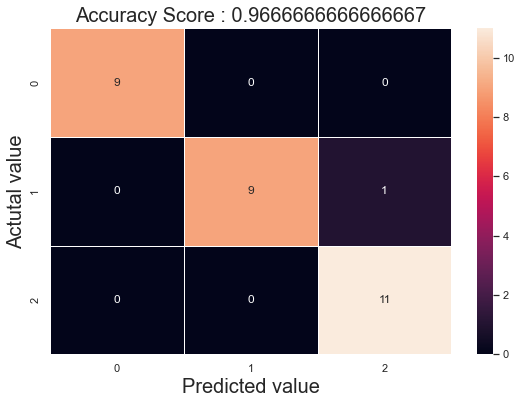

In [13]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.xlabel("Predicted value" , size=20)
plt.ylabel("Actutal value" , size=20)
all_sample_title= 'Accuracy Score : {0}'.format(score)
plt.title(all_sample_title , size=20)